# Webscrapping Job Postings 
You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal has two main objectives:

   1. Determine the industry factors that are most important in predicting the salary amounts for these data.
   2. Determine the factors that distinguish job categories and titles from each other. For example, can required skills accurately predict job title?

To limit the scope, your principal has suggested that you *focus on data-related job postings*, e.g. data scientist, data analyst, research scientist, business intelligence, and any others you might think of. You may also want to decrease the scope by *limiting your search to a single region.*

**Goal:** Scrape your own data from a job aggregation tool like Indeed.com in order to collect the data to best answer these two questions.

1) Identify factors that affect salary

2) Identify factors that distinguish job category (eg. can required skills accurately predict job title?))

**Scope Limitation**:

-Focus on 'Data-related Job Postings'

-Focus on one geographical region: Singapore (in our case)

In [1]:
from bs4 import BeautifulSoup
import urllib
from scrapy.selector import Selector
import requests
import pandas as pd
from time import sleep
from selenium import webdriver
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Webscrapping
### Let's gather data from our very own homegrown career site- mycareersfuture.sg by workforce singapore & govtech.

In [2]:
#function to get number of job listings for each keyword searched 
def num_jobs(keyword):
    driver = webdriver.Chrome(executable_path="C:/Windows/chromedriver.exe")
    url = 'https://www.mycareersfuture.sg/search?search={}&sortBy=new_posting_date&page=0'
    url = url.format(keyword)
    driver.get(url)  
    sleep(max([np.random.normal(2,0.01), np.random.normal(5,2)]))
    html = driver.page_source
    driver.close()
    res = Selector(text=html).xpath('//*[@id="search-results-message"]/div/text()').extract()
    num = int(res[0].split()[0].replace(',',''))
    return num

In [3]:
# #collect all the job links for every keywords(roles) searched
# pages = []
# roles = ['data scientist', 'data science', 'data analyst', 'data analytics', 'data engineer',
#         'business analytics', 'financial analytics', 'marketing analytics', 'data visualisation',
#          'data manager', 'data lead', 'data consultant', 'business intelligence',
#          'machine learning', 'deep learning', 'big data']  

# url = 'https://www.mycareersfuture.sg/search?search={}&sortBy=new_posting_date&page={}'

# for i in roles:
#     try:
#         for num in range(int(np.ceil(num_jobs(i)/20))):
#             pages.append(url.format(i,num))
#     except:
#         print("sth went wrong..")

In [4]:
# pages

In [5]:
# #let's compile every job link from every page from all the differnt keyword titles
# links = []
# for i in pages:
#     driver = webdriver.Chrome(executable_path="C:/Windows/chromedriver.exe")
#     driver.get(i)
#     sleep(max([np.random.normal(1,0.01), np.random.normal(4,2)]))
#     html = driver.page_source
#     driver.close()
#     link =  Selector(text=html).xpath('//div[@class="card relative"]/a/@href').extract()
#     links += link 

# full_links = []
# for l in links:
#     full_links.append('https://www.mycareersfuture.sg' + l)
# full_links

In [6]:
# len(full_links)
# full_links[3]

In [7]:
#Create the jobs DataFrame to save the jobs to
jobs_df = pd.DataFrame(columns=['url',
                                'company',
                                'title',
                                'job_id',
                                'location',
                                'employment_type',
                                'seniority',
                                'min_experience',
                                'industry',
                                'salary',
                                'post_date',
                                'expiry_date',
                                'responsibilities',
                                'requirements',
                                'coy_details'
                               ])
jobs_df

,url,company,title,job_id,location,employment_type,seniority,min_experience,industry,salary,post_date,expiry_date,responsibilities,requirements,coy_details


In [8]:
# #iterate through 5 drivers
# driver1 = webdriver.Chrome(executable_path="C:/Windows/chromedriver.exe")
# driver2 = webdriver.Chrome(executable_path="C:/Windows/chromedriver.exe")
# driver3 = webdriver.Chrome(executable_path="C:/Windows/chromedriver.exe")
# driver4 = webdriver.Chrome(executable_path="C:/Windows/chromedriver.exe")
# driver5 = webdriver.Chrome(executable_path="C:/Windows/chromedriver.exe")

# drivers = [driver1,driver2,driver3,driver4,driver5]
# #iterate thru every links with 5 concurrent drivers
# for num in range(0,len(full_links)-4, 5):
#     #open 5 job links at one go
#     driver1.get(full_links[num])
#     driver2.get(full_links[num+1])
#     driver3.get(full_links[num+2])
#     driver4.get(full_links[num+3])
#     driver5.get(full_links[num+4])
#     #give page some time to load
#     sleep(max([np.random.normal(6,0.01), np.random.normal(10,2)]))
    
#     for driver in drivers:
#         html = driver.page_source
#         #save job link's url
#         try:
#             jobs_df.loc[num+drivers.index(driver),'url'] = full_links[num+drivers.index(driver)]
#         except:
#             jobs_df.loc[num+drivers.index(driver),'url'] = None
#         #save company name
#         try:
#             jobs_df.loc[num+drivers.index(driver),'company'] = Selector(text=html).xpath('//p[@name="company"]/text()').extract() 
#         except:
#             jobs_df.loc[num+drivers.index(driver),'company'] = None
#         #save job title
#         try:
#             jobs_df.loc[num+drivers.index(driver),'title'] = Selector(text=html).xpath('//h1[@id = "job_title"]/text()').extract()
#         except:
#             jobs_df.loc[num+drivers.index(driver),'title'] = None
#         #save job id
#         try:
#             jobs_df.loc[num+drivers.index(driver),'job_id'] = Selector(text=html).xpath('//span[@class = "black-60 db f6 fw4 mv1"]/text()').extract()
#         except:
#             jobs_df.loc[num+drivers.index(driver),'job_id'] = None
#         #save location
#         try:
#             jobs_df.loc[num+drivers.index(driver),'location'] = Selector(text=html).xpath('//a[@class="link dark-pink underline-hover"]/text()').extract()   
#         except:
#             jobs_df.loc[num+drivers.index(driver),'location'] = None
#         #save employment tyoe    
#         try:
#             jobs_df.loc[num+drivers.index(driver),'employment_type'] = Selector(text=html).xpath('//p[@id = "employment_type"]/text()').extract()
#         except:
#             jobs_df.loc[num+drivers.index(driver),'employment_type'] = None
#         #save seniority level   
#         try:
#             jobs_df.loc[num+drivers.index(driver),'seniority'] = Selector(text=html).xpath('//p[@id = "seniority"]/text()').extract()
#         except:
#             jobs_df.loc[num+drivers.index(driver),'seniority'] = None
#         #save minimum experience    
#         try:
#             jobs_df.loc[num+drivers.index(driver),'min_experience'] = Selector(text=html).xpath('//p[@id = "min_experience"]/text()').extract()
#         except:
#             jobs_df.loc[num+drivers.index(driver),'min_experience'] = None
#         #save industry    
#         try:
#             jobs_df.loc[num+drivers.index(driver),'industry'] = Selector(text=html).xpath('//p[@id = "job-categories"]/text()').extract()
#         except:
#             jobs_df.loc[num+drivers.index(driver),'industry'] = None
#         #save salary    
#         try:
#             jobs_df.loc[num+drivers.index(driver),'salary'] = Selector(text=html).xpath('//span[@class = "dib"]/text()').extract()
#         except:
#             jobs_df.loc[num+drivers.index(driver),'salary'] = None
#         #save posted date    
#         try:
#             jobs_df.loc[num+drivers.index(driver),'post_date'] = Selector(text=html).xpath('//span[@id = "last_posted_date"]/text()').extract()
#         except:
#             jobs_df.loc[num+drivers.index(driver),'post_date'] = None
#         #save expiry date
#         try:
#             jobs_df.loc[num+drivers.index(driver),'expiry_date'] = Selector(text=html).xpath('//span[@id = "expiry_date"]/text()').extract()
#         except:
#             jobs_df.loc[num+drivers.index(driver),'expiry_date'] = None
#         #save job responsibilities    
#         try:
#             jobs_df.loc[num+drivers.index(driver),'responsibilities'] = Selector(text=html).xpath('//div[@id="description-content"]').extract()
#         except:
#             jobs_df.loc[num+drivers.index(driver),'responsibilities'] = None
#         #save job requirements    
#         try:
#             jobs_df.loc[num+drivers.index(driver),'requirements'] = Selector(text=html).xpath('//div[@id="requirements-content"]').extract()
#         except:
#             jobs_df.loc[num+drivers.index(driver),'requirements'] = None
#         #save company description    
#         try:
#             jobs_df.loc[num+drivers.index(driver),'coy_details'] = Selector(text=html).xpath('//div[@data-cy="companyinfo-writeup"]/p/text()').extract()
#         except:
#             jobs_df.loc[num+drivers.index(driver),'coy_details'] = None

#         #Sleep for a few seconds before pulling the next group of jobs
#         sleep(random.randint(1,4))

    
# #Save the full Dataframe into a csv file
# jobs_df.to_csv('jobs_list_final.csv')

# #Close all the drivers
# for driver in drivers:
#     driver.quit()        

# Data cleaning and EDA.  
While keeping our problem statements in mind.. 

Q1: What are the factors that can help in predicting salary?

Q2: Is is possible to predict the job title given the job features?

### Dealing with null values

In [9]:
df = pd.read_csv('./jobs_list_final.csv')

#remove '[]' and all the "" and '' from the cells
def remove_brackets_apostrophe(cell_value):
     return str(cell_value).replace('[','').replace(']','').replace("'", '').replace('"', '')
    
df = df.applymap(lambda x: remove_brackets_apostrophe(x))
df.head()

,Unnamed: 0,url,company,title,job_id,location,employment_type,seniority,min_experience,industry,salary,post_date,expiry_date,responsibilities,requirements,coy_details
0,0,https://www.mycareersfuture.sg/job/data-scient...,NTUC ENTERPRISE NEXUS CO-OPERATIVE LIMITED,Data Scientist,JOB-2019-0097068,,Full Time,Executive,4 years exp,Information Technology,"$3,500, $8,000",Posted 08 May 2019,Closing on 06 Jun 2019,<div class=f5 fw4 black-70 lh-copy break-word ...,<div class=f5 fw4 black-70 lh-copy break-word ...,
1,1,https://www.mycareersfuture.sg/job/data-scient...,OVERSEA-CHINESE BANKING CORPORATION LIMITED,Data Scientist,JOB-2019-0097264,63 CHULIA STREET 049514,Permanent,Professional,6 years exp,Banking and Finance,"$4,800, $8,000",Posted 08 May 2019,Closing on 07 Jun 2019,<div class=f5 fw4 black-70 lh-copy break-word ...,<div class=f5 fw4 black-70 lh-copy break-word ...,\n\tThe OCBC Bank group of businesses comprise...
2,2,https://www.mycareersfuture.sg/job/data-scient...,OVERSEA-CHINESE BANKING CORPORATION LIMITED,Data Scientist,JOB-2019-0097260,63 CHULIA STREET 049514,Permanent,Professional,6 years exp,Banking and Finance,"$8,000, $15,000",Posted 08 May 2019,Closing on 07 Jun 2019,<div class=f5 fw4 black-70 lh-copy break-word ...,<div class=f5 fw4 black-70 lh-copy break-word ...,\n\tThe OCBC Bank group of businesses comprise...
3,3,https://www.mycareersfuture.sg/job/data-scient...,PANASONIC ASIA PACIFIC PTE. LTD.,Data Scientist,JOB-2019-0096282,202 BEDOK SOUTH AVENUE 1 469332,Permanent,"Executive, Junior Executive",,Information Technology,"$3,000, $4,600",Posted 07 May 2019,Closing on 06 Jun 2019,<div class=f5 fw4 black-70 lh-copy break-word ...,<div class=f5 fw4 black-70 lh-copy break-word ...,
4,4,https://www.mycareersfuture.sg/job/data-scient...,NIOMETRICS (PTE.) LTD.,Data Scientist,JOB-2019-0096410,"PARKVIEW SQUARE, 600 NORTH BRIDGE ROAD 188778",Permanent,Professional,2 years exp,Information Technology,"$5,000, $10,000",Posted 07 May 2019,Closing on 06 Jun 2019,<div class=f5 fw4 black-70 lh-copy break-word ...,<div class=f5 fw4 black-70 lh-copy break-word ...,Niometrics is a network analytics company that...


In [10]:
df.shape
print(df.columns)

Index(['Unnamed: 0', 'url', 'company', 'title', 'job_id', 'location',
       'employment_type', 'seniority', 'min_experience', 'industry', 'salary',
       'post_date', 'expiry_date', 'responsibilities', 'requirements',
       'coy_details'],
      dtype='object')


In [11]:
df.info()  #seems like the null values are considered non-null too, let's tackle that.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720 entries, 0 to 1719
Data columns (total 16 columns):
Unnamed: 0          1720 non-null object
url                 1720 non-null object
company             1720 non-null object
title               1720 non-null object
job_id              1720 non-null object
location            1720 non-null object
employment_type     1720 non-null object
seniority           1720 non-null object
min_experience      1720 non-null object
industry            1720 non-null object
salary              1720 non-null object
post_date           1720 non-null object
expiry_date         1720 non-null object
responsibilities    1720 non-null object
requirements        1720 non-null object
coy_details         1720 non-null object
dtypes: object(16)
memory usage: 215.1+ KB


In [12]:
#first things first, let's check if we have any duplicates by referencing on job_id 
dupes = df[df.duplicated(subset='job_id',keep='first')]
df.drop(list(dupes.index),inplace=True)  #we found some duplicates, let's drop them.
df.shape

(1078, 16)

In [13]:
# seems like there's a random column with no meaning, let's remove it.
df.drop(columns='Unnamed: 0', inplace=True)
#next let's convert all those empty lists to null values
df = df.applymap(lambda x: x if len(x) > 2 else np.nan) #empty lists are length of 2

In [14]:
#remove the common 13 entries that are missing at large - prolly expired links
nulls = list(df[df.company.isnull()].index)  
df.drop(nulls,inplace=True)
df.shape

(1077, 15)

In [119]:
#Since salary is our target in Q1, and quite crucial in our model, it makes sense to remove those
#observations that are null in salary
null_sal = list(df[df.salary.isnull()].index)
df.drop(null_sal,inplace=True)

In [135]:
df.dropna(subset=['seniority'], inplace=True) #drop the 3 null seniority values

In [16]:
#let's remove "min_experience" column, too much missing values so it won't be helpful for our analysis
df.drop(columns=['min_experience'],inplace=True)

In [127]:
df.isnull().sum()
# df.shape
#quite abit of missing values location and company details! To prevent further data loss,
#Let's keep it for now and see what we can do with them later on.

url                    0
company                0
title                  0
job_id                 0
location             165
employment_type        0
seniority              0
industry               0
salary                 0
post_date              0
expiry_date            0
responsibilities       0
requirements          30
coy_details          182
min_salary             0
max_salary             0
higher_pay             0
Freelance              0
Part Time              0
Permanent              0
Temporary              0
Internship             0
Contract               0
Full Time              0
Fresh/entry level      0
Manager                0
Senior Executive       0
Middle Management      0
Non-executive          0
Senior Management      0
Junior Executive       0
nan                    0
Executive              0
Professional           0
dtype: int64

## Now, time for Feature engineering/further cleaning and EDA! Some columns seem to have more than one value in each cell..eg. Employment_type, seniority, salary, etc. 
###  Start by cleaning numerical columns (Salary and Dates)

In [20]:
df.head(3)

,url,company,title,job_id,location,employment_type,seniority,industry,salary,post_date,expiry_date,responsibilities,requirements,coy_details
0,https://www.mycareersfuture.sg/job/data-scient...,NTUC ENTERPRISE NEXUS CO-OPERATIVE LIMITED,Data Scientist,JOB-2019-0097068,NaN,Full Time,Executive,Information Technology,"$3,500, $8,000",Posted 08 May 2019,Closing on 06 Jun 2019,<div class=f5 fw4 black-70 lh-copy break-word ...,<div class=f5 fw4 black-70 lh-copy break-word ...,NaN
1,https://www.mycareersfuture.sg/job/data-scient...,OVERSEA-CHINESE BANKING CORPORATION LIMITED,Data Scientist,JOB-2019-0097264,63 CHULIA STREET 049514,Permanent,Professional,Banking and Finance,"$4,800, $8,000",Posted 08 May 2019,Closing on 07 Jun 2019,<div class=f5 fw4 black-70 lh-copy break-word ...,<div class=f5 fw4 black-70 lh-copy break-word ...,\n\tThe OCBC Bank group of businesses comprise...
2,https://www.mycareersfuture.sg/job/data-scient...,OVERSEA-CHINESE BANKING CORPORATION LIMITED,Data Scientist,JOB-2019-0097260,63 CHULIA STREET 049514,Permanent,Professional,Banking and Finance,"$8,000, $15,000",Posted 08 May 2019,Closing on 07 Jun 2019,<div class=f5 fw4 black-70 lh-copy break-word ...,<div class=f5 fw4 black-70 lh-copy break-word ...,\n\tThe OCBC Bank group of businesses comprise...


#### Cleaning Salary and setting our target variable.

In [19]:
df.salary.head() #in strings, and $ - needs cleaning

0     $3,500, $8,000
1     $4,800, $8,000
2    $8,000, $15,000
3     $3,000, $4,600
4    $5,000, $10,000
Name: salary, dtype: object

In [39]:
x = df.salary[0]
x.replace('$','').replace(',','').split()[0]

'3500'

In [40]:
# since we know salary is a range, let's split it up into min and max. 
#remove commas and $ in every cell, then split every cell by commas in (min,max) format
df['min_salary'] = df.salary.map(lambda x: x.replace('$','').replace(',','').split()[0]) 
df['max_salary'] = df.salary.map(lambda x: x.replace('$','').replace(',','').split()[1]) 
#change data type to int
df.min_salary = df.min_salary.astype('int64')  
df.max_salary = df.max_salary.astype('int64')

In [42]:
df.describe()
#looking at maximum of min_salary, $280,000 seems to good to be true?? 
#Perhaps those are figures in annual remuneration..let's further investigate!

,min_salary,max_salary
count,985.000000,985.000000
mean,10213.378680,16592.425381
std,23957.246245,40443.380668
min,1.000000,2000.000000
25%,3800.000000,6000.000000
50%,5000.000000,8000.000000
75%,7000.000000,11000.000000
max,280000.000000,418000.000000


In [43]:
df[df.min_salary>30000]  
#looking into the first few links, as suspected, these companies are offering salary in annual numbers! 
# $30k is a good gauge/assumption as that is a typical CEO pay of a big organization

,url,company,title,job_id,location,employment_type,seniority,industry,salary,post_date,expiry_date,responsibilities,requirements,coy_details,min_salary,max_salary
54,https://www.mycareersfuture.sg/job/applied-dat...,DATAROBOT SINGAPORE PTE. LTD.,Applied Data Science Associate,JOB-2019-0087609,80 ROBINSON ROAD 068898,Permanent,Professional,Information Technology,"$90,000, $150,000",Posted 24 Apr 2019,Closing on 24 May 2019,<div class=f5 fw4 black-70 lh-copy break-word ...,<div class=f5 fw4 black-70 lh-copy break-word ...,DataRobot is one of the fastest growing AI com...,90000,150000
57,https://www.mycareersfuture.sg/job/data-scient...,DATAROBOT SINGAPORE PTE. LTD.,"Data Scientist, Trusted AI",JOB-2019-0058795,80 ROBINSON ROAD 068898,Permanent,Professional,Information Technology,"$90,000, $150,000",Posted 23 Apr 2019,Closing on 23 May 2019,<div class=f5 fw4 black-70 lh-copy break-word ...,<div class=f5 fw4 black-70 lh-copy break-word ...,DataRobot is one of the fastest growing AI com...,90000,150000
65,https://www.mycareersfuture.sg/job/data-scient...,DATAROBOT SINGAPORE PTE. LTD.,"Data Scientist, AI Services",JOB-2019-0085080,80 ROBINSON ROAD 068898,Permanent,Professional,Information Technology,"$90,000, $150,000",Posted 22 Apr 2019,Closing on 22 May 2019,<div class=f5 fw4 black-70 lh-copy break-word ...,<div class=f5 fw4 black-70 lh-copy break-word ...,DataRobot is one of the fastest growing AI com...,90000,150000
83,https://www.mycareersfuture.sg/job/intelligent...,ONECONNECT FINANCIAL TECHNOLOGY (SINGAPORE) CO...,Intelligent Risk Data Scientist Manager / Assi...,JOB-2019-0082086,NaN,"Permanent, Full Time",Senior Executive,Information Technology,"$96,000, $120,000",Posted 17 Apr 2019,Closing on 17 May 2019,<div class=f5 fw4 black-70 lh-copy break-word ...,<div class=f5 fw4 black-70 lh-copy break-word ...,OneConnect is a leading Fintech SaaS provider ...,96000,120000
118,https://www.mycareersfuture.sg/job/senior-data...,CISCO SYSTEMS (USA) PTE. LTD.,Senior Data Scientist,JOB-2019-0075028,"ONE MARINA BOULEVARD, 1 MARINA BOULEVARD 018989",Full Time,Professional,Information Technology,"$170,000, $230,000",Posted 09 Apr 2019,Closing on 09 May 2019,<div class=f5 fw4 black-70 lh-copy break-word ...,<div class=f5 fw4 black-70 lh-copy break-word ...,"\n\tCISCO SYSTEMS (USA) PTE. LTD., \n\tCISCO S...",170000,230000
143,https://www.mycareersfuture.sg/job/sales-opera...,UBER SINGAPORE TECHNOLOGY PTE. LTD.,Sales Operations Manager - Strategy and Planni...,JOB-2019-0095685,"FRASERS TOWER, 182 CECIL STREET 069547",Permanent,Manager,Others,"$140,000, $240,000",Posted 06 May 2019,Closing on 05 Jun 2019,<div class=f5 fw4 black-70 lh-copy break-word ...,<div class=f5 fw4 black-70 lh-copy break-word ...,"\n\tUBER SINGAPORE TECHNOLOGY PTE. LTD., \n\tU...",140000,240000
144,https://www.mycareersfuture.sg/job/sales-opera...,UBER SINGAPORE TECHNOLOGY PTE. LTD.,Sales Operations Lead - UberEats (APAC),JOB-2019-0095670,"FRASERS TOWER, 182 CECIL STREET 069547",Permanent,Senior Executive,Others,"$102,000, $138,000",Posted 06 May 2019,Closing on 05 Jun 2019,<div class=f5 fw4 black-70 lh-copy break-word ...,<div class=f5 fw4 black-70 lh-copy break-word ...,"\n\tUBER SINGAPORE TECHNOLOGY PTE. LTD., \n\tU...",102000,138000
163,https://www.mycareersfuture.sg/job/senior-rese...,NATIONAL UNIVERSITY OF SINGAPORE,Senior Research Fellow (Institute of Data Scie...,JOB-2019-0091263,21 LOWER KENT RIDGE ROAD 119077,Contract,Non-executive,Sciences / Laboratory / R&D,"$72,000, $140,000",Posted 29 Apr 2019,Closing on 29 May 2019,<div class=f5 fw4 black-70 lh-copy break-word ...,<div class=f5 fw4 black-70 lh-copy break-word ...,The National University of Singapore aspires t...,72000,140000
188,https://www.mycareersfuture.sg/job/business-in...,DATAROBOT SINGAPORE PTE. LTD.,Business Intelligence Analyst - Machine Engine...,JOB-2019-0086886,80 ROBINSON ROAD 068898,Permanent,Professional,Information Technology,"$90,000, $150,000",Posted 24 Apr 2019,Closing on 24 May 2019,<div

In [76]:
#converting salary figures into monthly format
df.min_salary = df.min_salary.map(lambda x: x/12 if x > 30000 else x)
df.max_salary = df.max_salary.map(lambda x: x/12 if x > 30000 else x)
df.describe() #checking

,min_salary,max_salary,post_duration
count,985.000000,985.000000,985
mean,5630.045347,8791.281839,31 days 22:46:54.213197
std,2659.957066,4086.999208,16 days 01:46:06.181995
min,1.000000,2000.000000,14 days 00:00:00
25%,3800.000000,6000.000000,30 days 00:00:00
50%,5000.000000,8000.000000,30 days 00:00:00
75%,7000.000000,11000.000000,30 days 00:00:00
max,23333.333333,25000.000000,186 days 00:00:00


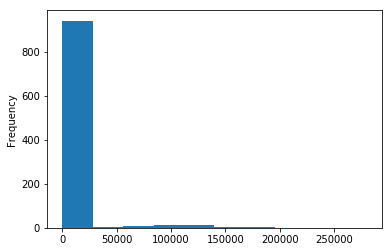

In [45]:
df.min_salary.plot(kind='hist') #seems like there's a positive skew, which is kind of expected.
#This informs on our threshold, which cannot just be the median. 
#let's take the 75th percentile to be our threshold for higher paying jobs.

#setting our target variable
df['higher_pay'] = [1 if sal >= 7000 else 0 for sal in df.min_salary]

#### Let's try converting post date and expiry date into a duration format, perhaps it can provide useful insights later on

In [49]:
df.post_date.head()
df.expiry_date.head()
#dates seems to be in object type

0    ['Closing on 06 Jun 2019']
1    ['Closing on 07 Jun 2019']
2    ['Closing on 07 Jun 2019']
3    ['Closing on 06 Jun 2019']
4    ['Closing on 06 Jun 2019']
Name: expiry_date, dtype: object

In [60]:
import datetime
#remove text in dates
df.post_date = [date[9:-2] for date in df.post_date]
df.expiry_date = [date[13:-2] for date in df.expiry_date]

#change dates to datetime format
df.post_date = pd.to_datetime(df.post_date)
df.expiry_date = pd.to_datetime(df.expiry_date)

In [68]:
#find duration
df['post_duration'] = df.expiry_date - df.post_date
df.post_duration.head(10)
#drop post and expiry date
# df.drop(['post_date','expiry_date'],axis=1, inplace=True)

0    29 days
1    30 days
2    30 days
3    30 days
4    30 days
5    30 days
6    30 days
7    30 days
8    15 days
10   30 days
Name: post_duration, dtype: timedelta64[ns]

In [72]:
df.post_duration.value_counts()  #seems like most posts last for approx a month. 
#Being highly skewed, it most probably wont be useful for analysis.

30 days     911
15 days      14
29 days      11
14 days       9
186 days      3
118 days      3
16 days       3
114 days      2
17 days       2
92 days       2
88 days       2
18 days       2
178 days      2
22 days       2
96 days       2
21 days       1
32 days       1
27 days       1
94 days       1
177 days      1
93 days       1
104 days      1
115 days      1
108 days      1
91 days       1
102 days      1
23 days       1
130 days      1
51 days       1
107 days      1
Name: post_duration, dtype: int64

### Dealing with categorical/non-numerical columns

In [74]:
df.columns

Index(['url', 'company', 'title', 'job_id', 'location', 'employment_type',
       'seniority', 'industry', 'salary', 'responsibilities', 'requirements',
       'coy_details', 'min_salary', 'max_salary', 'post_duration'],
      dtype='object')

In [75]:
df.title.unique() #quite varied in general. 
#Note to self: rmb to change titles to lowercase for vectorizing later if we intend to use it as feature

array(["['Data Scientist']", "['Senior Data Scientist']",
       "['Data Senior Analyst / Data Scientist- Oracle PL / SQL']",
       "['Data Scientist - Information Technology']",
       "['Technical Lead']", "['DATA SCIENTIST']",
       "['Senior Associate, Junior Data Scientist, DBS Transformation Group, T&O (WD03390)']",
       "['Associate, Junior Data Scientist, DBS Transformation Group, T&O (WD03390)']",
       "['Senior Associate, Junior Data Scientist, DBS Transformation Group, T&O (WD03574)']",
       "['Associate, Junior Data Scientist, DBS Transformation Group, T&O (WD03574)']",
       "['DATA Scientist']", "['Tech Lead']",
       "['Research Scientist (Data Scientist)']",
       "['Senior /  Data Engineer']", "['Data Engineer']",
       "['Senior Java Developer']", "['Radar Rainfall Specialist']",
       "['Product Analyst']", "['Finance Data Scientist']",
       "['Postdoctoral Fellow / Research Fellow (Data Analytics) / Data Scientist']",
       "['Senior Consultant (Data

#### There seems to be multiple employment types in a single job posting. Further, there seems to be no particular order (whether alphabetical or ranking/importance) in how the emp types were spelled out.  

In [53]:
df.employment_type.value_counts()

Full Time                                    332
Permanent                                    304
Permanent, Full Time                         153
Contract, Full Time                          110
Contract                                      58
Permanent, Contract, Full Time                10
Permanent, Contract                            9
Full Time, Internship                          4
Part Time, Permanent, Full Time                1
Internship                                     1
Temporary, Contract, Full Time                 1
Permanent, Temporary, Contract, Freelance      1
Temporary                                      1
Name: employment_type, dtype: int64

In [81]:
#find out the unique employmen types 
u_emp = set()
for i in df.employment_type.str.split(","):
    for employ_type in i:
        if employ_type not in u_emp:
            u_emp.add(' '.join(employ_type.split()))
u_emp

{'Contract',
 'Freelance',
 'Full Time',
 'Internship',
 'Part Time',
 'Permanent',
 'Temporary'}

In [59]:
#Turn each unique employment type into a feature. Looking at each row, if present, 1 else 0. 
for employ_type in u_emp:
    df[employ_type]=[1 if employ_type in employment else 0 for employment in df['employment_type']]
df.head()

,url,company,title,job_id,location,employment_type,seniority,industry,salary,post_date,...,min_salary,max_salary,higher_pay,Freelance,Part Time,Permanent,Temporary,Internship,Contract,Full Time
0,https://www.mycareersfuture.sg/job/data-scient...,NTUC ENTERPRISE NEXUS CO-OPERATIVE LIMITED,Data Scientist,JOB-2019-0097068,NaN,Full Time,Executive,Information Technology,"$3,500, $8,000",Posted 08 May 2019,...,3500,8000,0,0,0,0,0,0,0,1
1,https://www.mycareersfuture.sg/job/data-scient...,OVERSEA-CHINESE BANKING CORPORATION LIMITED,Data Scientist,JOB-2019-0097264,63 CHULIA STREET 049514,Permanent,Professional,Banking and Finance,"$4,800, $8,000",Posted 08 May 2019,...,4800,8000,0,0,0,1,0,0,0,0
2,https://www.mycareersfuture.sg/job/data-scient...,OVERSEA-CHINESE BANKING CORPORATION LIMITED,Data Scientist,JOB-2019-0097260,63 CHULIA STREET 049514,Permanent,Professional,Banking and Finance,"$8,000, $15,000",Posted 08 May 2019,...,8000,15000,1,0,0,1,0,0,0,0
3,https://www.mycareersfuture.sg/job/data-scient...,PANASONIC ASIA PACIFIC PTE. LTD.,Data Scientist,JOB-2019-0096282,202 BEDOK SOUTH AVENUE 1 469332,Permanent,"Executive, Junior Executive",Information Technology,"$3,000, $4,600",Posted 07 May 2019,...,3000,4600,0,0,0,1,0,0,0,0
4,https://www.mycareersfuture.sg/job/data-scient...,NIOMETRICS (PTE.) LTD.,Data Scientist,JOB-2019-0096410,"PARKVIEW SQUARE, 600 NORTH BRIDGE ROAD 188778",Permanent,Professional,Information Technology,"$5,000, $10,000",Posted 07 May 2019,...,5000,10000,0,0,0,1,0,0,0,0


            Higher Pay  Lower Pay
Freelance            0          1
Part Time            0          1
Permanent          153        325
Temporary            0          3
Internship           0          5
Contract            27        162
Full Time          152        459


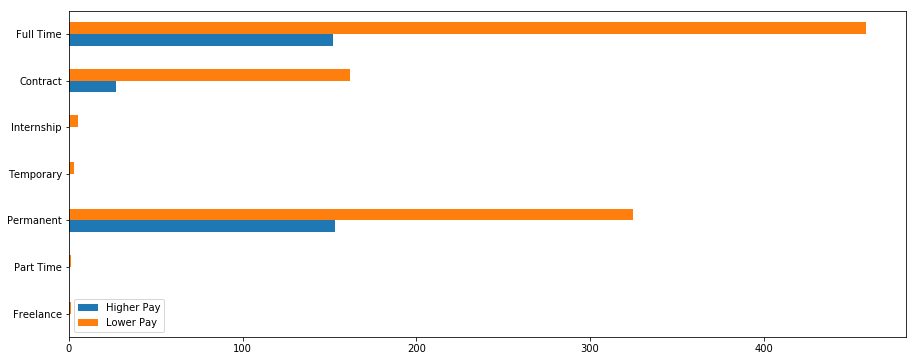

In [80]:
#let's see how often each employ type appears in the higher and lower pay rungs
uemp_salary = pd.DataFrame({'Higher Pay': df[df['higher_pay']==1][list(u_emp)].sum(),
                            'Lower Pay': df[df['higher_pay']==0][list(u_emp)].sum()
                           }, index = list(u_emp))
print(uemp_salary)
uemp_salary.plot(kind='barh',figsize=(15,6))

**Analysis**

Across the board we see more occureces of lower paying jobs than high paying ones.

- As expected, part-time, freelance, temporary and internship roles see almost no occurences of high pay
- Jobs of full time, permanent and contract nature see more occurences of high pay



#### Likewise, we see the same situation with seniority values. Let's run through the same process.

In [151]:
df.seniority.value_counts()
#change dtype to object
df.seniority = df.seniority.astype('str')

In [161]:
#find unique seniority ranks
# u_sen = []
# for seniority in df.seniority.str.split(','):
# #     print(seniority)
#     for sen in seniority:
#         if sen.strip() not in u_sen:
#             u_sen.append(sen)
# u_sen

#find out the unique seniority ranks 
u_sen = set()
for seniority in df.seniority.str.split(","):
    for sen in seniority:
        if sen not in u_sen:
            u_sen.add(' '.join(sen.split()))
u_sen

{'Executive',
 'Fresh/entry level',
 'Junior Executive',
 'Manager',
 'Middle Management',
 'Non-executive',
 'Professional',
 'Senior Executive',
 'Senior Management'}

In [157]:
#some null value slipped into our datafrmae..let's remove it
df.drop(df[df.seniority=='nan'].index, inplace=True)

In [162]:
#turn each seniority rank into a feature
for sen in u_sen:
    df[sen] = [1 if sen in seniority else 0 for seniority in df.seniority]

                   High Pay  Low Pay
Fresh/entry level         1       49
Manager                  58       64
Senior Executive         29      104
Middle Management        43       41
Non-executive            15       36
Senior Management        36       12
Junior Executive          3       48
Executive                50      332
Professional            109      249


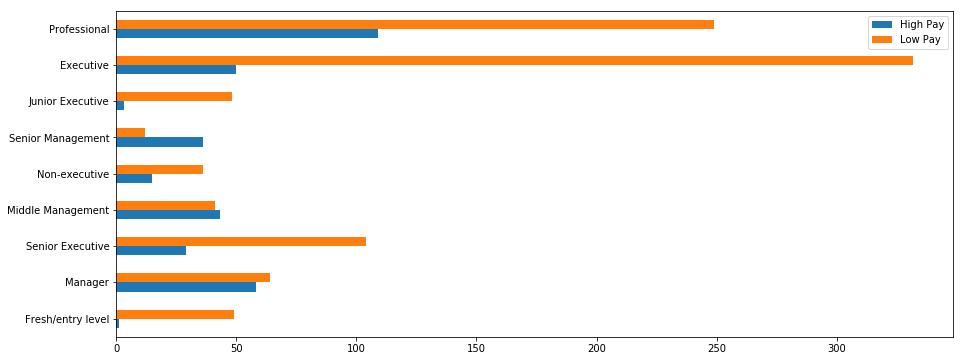

In [172]:
seniority_df = pd.DataFrame({'High Pay': df[df['higher_pay']==1][list(u_sen)].sum(),
                             'Low Pay': df[df['higher_pay']==0][list(u_sen)].sum() 
                            }, index = list(u_sen))
print(seniority_df)

seniority_df.plot(kind='barh',figsize=(15,6))

**Analysis**

Across the board, we see more occurences of low pay as compared to high. 

- As expected, looking at fresh/entry and executive roles, there is significantly higher proportion of low pay to high.
- Whereas for ranks like manager, middle and senior mgmt, there is relatively more high pay occurences, with the latter two seeing more high pay instances.

####  Next, let's look at the responsibilities and requirements columns. As they are in text forms, i'm inclined to use WordCloud to get a quick and dirty sensing of them.

In [190]:
# df.drop(columns=['post_date','expiry_date'],inplace=True)
df.columns

Index(['url', 'company', 'title', 'job_id', 'location', 'employment_type',
       'seniority', 'industry', 'salary', 'responsibilities', 'requirements',
       'coy_details', 'min_salary', 'max_salary', 'higher_pay', 'Freelance',
       'Part Time', 'Permanent', 'Temporary', 'Internship', 'Contract',
       'Full Time', 'Fresh/entry level', 'Manager', 'Senior Executive',
       'Middle Management', 'Non-executive', 'Senior Management',
       'Junior Executive', 'Executive', 'Professional'],
      dtype='object')

In [198]:
df.requirements.fillna('undisclosed',inplace=True)  #replace null value in requirements

In [205]:
def remove_html_tags(text):
    """function to remove html tags from a string"""
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

df.responsibilities = df.responsibilities.map(lambda x: remove_html_tags(x).replace('\\t','').replace('\\xa0',''))
df.requirements = df.requirements.map(lambda x: remove_html_tags(x).replace('\\t','').replace('\\xa0',''))

([], <a list of 0 Text yticklabel objects>)

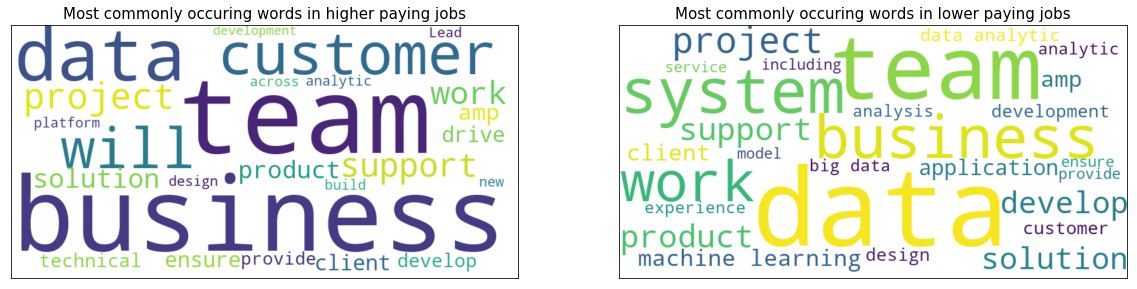

In [211]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#Take a look at the most commonly occuring words in the job responsibilities
#Separate the text for higher and lower paying jobs, put them into a single document respectively
texthigh = ''.join(words for words in df[df['higher_pay']==1]['responsibilities'])
textlow = ''.join(words for words in df[df['higher_pay']==0]['responsibilities'])

#Generate the words clouds for higher and lower paying jobs
wordcloudhigh=WordCloud(min_font_size=10,scale = 2,prefer_horizontal=1, background_color='White').generate(texthigh)
wordcloudlow= WordCloud(min_font_size=10,scale = 2,prefer_horizontal=1, background_color='White').generate(textlow)

#Plot the wordclouds
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(wordcloudhigh,interpolation='bilinear')
plt.title('Most commonly occuring words in higher paying jobs',fontsize=15)
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(wordcloudlow,interpolation='bilinear')
plt.title('Most commonly occuring words in lower paying jobs',fontsize=15)
plt.xticks([])
plt.yticks([])


Looking at the highly emphasised words, we see many mentions of: team, business, data, product, project and client. The wordcloud insights gathered from the responsibilities description doesn't seem particularly helpful in this case. 

([], <a list of 0 Text yticklabel objects>)

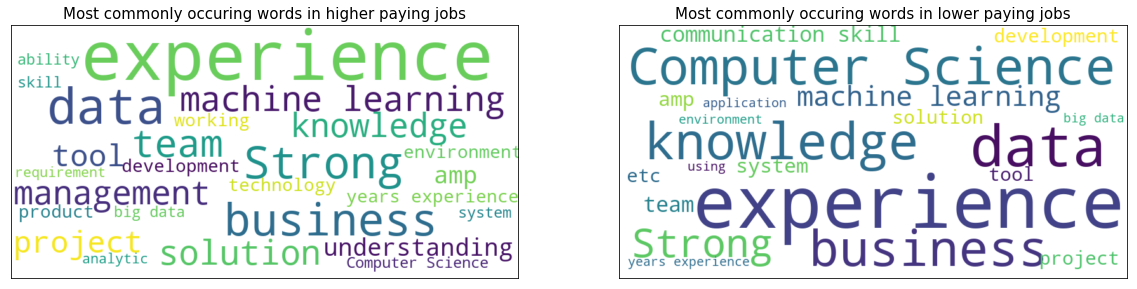

In [212]:
#Take a look at the most commonly occuring words in the job requirements
#Separate the text for higher and lower paying jobs, put them into a single document respectively
texthigh = ''.join(words for words in df[df['higher_pay']==1]['requirements'])
textlow = ''.join(words for words in df[df['higher_pay']==0]['requirements'])

#Generate the words clouds for higher and lower paying jobs
wordcloudhigh=WordCloud(min_font_size=10,scale = 2,prefer_horizontal=1, background_color='White').generate(texthigh)
wordcloudlow= WordCloud(min_font_size=10,scale = 2,prefer_horizontal=1, background_color='White').generate(textlow)

#Plot the wordclouds
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(wordcloudhigh,interpolation='bilinear')
plt.title('Most commonly occuring words in higher paying jobs',fontsize=15)
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(wordcloudlow,interpolation='bilinear')
plt.title('Most commonly occuring words in lower paying jobs',fontsize=15)
plt.xticks([])
plt.yticks([])


From the results, we see equal strong emphasis on words like: experience, business, data, machine learning. 

## Q1: Identify factors that can predict salary (in our case, whether we can correctly classify a job to be high_salary: 1 or not: 0)

In [220]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from scipy.sparse import csr_matrix, hstack
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier

In [215]:
df.columns

Index(['url', 'company', 'title', 'job_id', 'location', 'employment_type',
       'seniority', 'industry', 'salary', 'responsibilities', 'requirements',
       'coy_details', 'min_salary', 'max_salary', 'higher_pay', 'Freelance',
       'Part Time', 'Permanent', 'Temporary', 'Internship', 'Contract',
       'Full Time', 'Fresh/entry level', 'Manager', 'Senior Executive',
       'Middle Management', 'Non-executive', 'Senior Management',
       'Junior Executive', 'Executive', 'Professional'],
      dtype='object')

#### 1.1 Let's begin with a simple model based on Seniority

In [227]:
X = df[list(u_sen)]
y = df.higher_pay

#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 11)

#baseline accuracy
max(np.mean(y_test), 1-np.mean(y_test))

0.7016949152542373

In [332]:
#create function to compare cv scores of models
def model_compare(models,X_train, y_train, score):
    """
    This function takes in a list of models, X_train, y_train and based on the scoring metric (score),
    returns a dataframe with the model and their respective CV scores.
    """
    
    scores_dict = {}
    for model in models:
        model.fit(X_train,y_train)
        scores = cross_val_score(model,X_train,y_train, cv=10, n_jobs=-10, scoring = score)
        
        scores_dict[model] = scores
        
    return pd.DataFrame(scores_dict)

C:\Users\Jit Nung\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


([<matplotlib.axis.XTick at 0x1dd314844e0>,
 <a list of 3 Text xticklabel objects>)

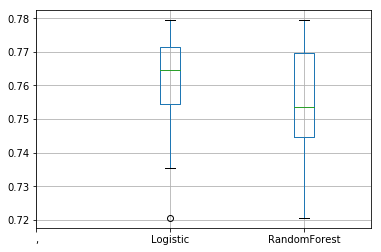

In [333]:
#let's try a simple logistic and random forest classifier
lr = LogisticRegression(solver='lbfgs')
rfc = RandomForestClassifier()

#let's use accuracy as our scoring metric 
models = [lr,rfc]
model_summary = model_compare(models, X_train, y_train, 'accuracy')
model_summary.boxplot()
plt.xticks(np.arange(3),[',','Logistic','RandomForest'])

#Logreg seems to fare better, and also have a smaller std dev as compared to rfc. 

([<matplotlib.axis.XTick at 0x1dd358f1898>,
 <a list of 3 Text xticklabel objects>)

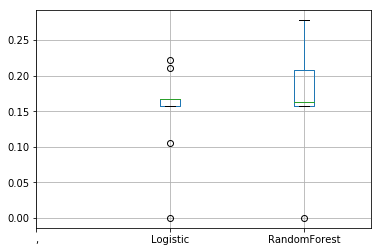

In [334]:
#let's see how the models perform on the "recall" scoring metric
model_summary = model_compare(models, X_train, y_train, 'recall')
model_summary.boxplot()
plt.xticks(np.arange(3),[',','Logistic','RandomForest'])

#Logreg and rfc seems to fare equally, and like before, rfc has a larger std dev in cv scores.

In [302]:
def classreport_auc(estimator, X, y):
    """
    this function will take in an estimator, as well as X_test and y_test. It returns a classification report and
    the AUC score.
    """
    predicted = estimator.predict(X)
    pred_proba = estimator.predict_proba(X)
    print(classification_report(y,predicted))
    print("AUC Score:", roc_auc_score(y, pred_proba[:,1]))

In [287]:
#look at classification report for logreg

lr = LogisticRegression()
lr.fit(X_train,y_train)
classreport_auc(lr,X_test,y_test)
#recall and f1 score for class 1 looks really bad..

              precision    recall  f1-score   support

           0       0.72      0.97      0.83       207
           1       0.65      0.12      0.21        88

   micro avg       0.72      0.72      0.72       295
   macro avg       0.69      0.55      0.52       295
weighted avg       0.70      0.72      0.64       295

AUC Score: 0.7280412823891085


C:\Users\Jit Nung\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [289]:
#look at classification report for RFC

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
classreport_auc(rfc,X_test,y_test)
#recall and f1 score for class 1 looks bad too, but we see an improvement on auc_roc score!

              precision    recall  f1-score   support

           0       0.73      0.97      0.83       207
           1       0.67      0.16      0.26        88

   micro avg       0.73      0.73      0.73       295
   macro avg       0.70      0.56      0.54       295
weighted avg       0.71      0.73      0.66       295

AUC Score: 0.7710803689064558


C:\Users\Jit Nung\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### 1.2 Include Employment type in the model 

In [294]:
X_train_emp = pd.concat([X_train, df.loc[X_train.index,list(u_emp)]], axis =1)
X_test_emp = pd.concat([X_test, df.loc[X_test.index,list(u_emp)]], axis =1)

C:\Users\Jit Nung\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


([<matplotlib.axis.XTick at 0x1dd30fc1b38>,
 <a list of 2 Text xticklabel objects>)

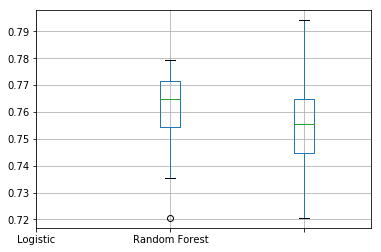

In [300]:
lr = LogisticRegression(solver='lbfgs')
rfc = RandomForestClassifier()
models = [lr,rfc]

#see results on accuracy
summary = model_compare(models, X_train, y_train,'accuracy')
summary.boxplot()
plt.xticks(np.arange(3),['Logistic','Random Forest'])

In [303]:
#logistic reg classification report
lr.fit(X_train_emp,y_train)
classreport_auc(lr, X_test_emp, y_test)

#recall, f1-score and auc score better than before! Addition of employment type is beneficial!

              precision    recall  f1-score   support

           0       0.75      0.92      0.83       207
           1       0.60      0.30      0.40        88

   micro avg       0.73      0.73      0.73       295
   macro avg       0.68      0.61      0.61       295
weighted avg       0.71      0.73      0.70       295

AUC Score: 0.7500274483970137


In [311]:
#rfc classification report
rfc.fit(X_train_emp,y_train)
classreport_auc(rfc, X_test_emp, y_test)

#recall, f1-score and auc score better than before! Addition of employment type is beneficial!

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       207
           1       0.59      0.42      0.49        88

   micro avg       0.74      0.74      0.74       295
   macro avg       0.68      0.65      0.66       295
weighted avg       0.72      0.74      0.72       295

AUC Score: 0.7807696530522619


#### 1.3 Now add Responsibilites and Requirements into the model

In [328]:
#Create a function to vectorize, split and retrieve feature names for text columns
def text_ttsplit(vectorizer,col):
    '''
    DOCSTRING: This function takes in a vectorizer, and column name to vectorize the text and return the train sets, test
    sets and feature names 
    INPUT: a text vectorizer, column name
    OUTPUT: train set, test set, feature names
    '''
    train = vectorizer.fit_transform(df.loc[X_train.index][col])
    test = vectorizer.transform(df.loc[X_test.index][col])
    features = [col+': '+name for name in vectorizer.get_feature_names()]
    
    return train, test, features

In [329]:
#Vectorize and split the responsibilities and requirements columns
cvec = CountVectorizer(ngram_range=(1,2))
resp_train, resp_test, resp_features = text_ttsplit(cvec,'responsibilities')
req_train, req_test, req_features = text_ttsplit(cvec,'requirements')

In [327]:
resp_train

<687x65177 sparse matrix of type '<class 'numpy.int64'>'
	with 227512 stored elements in Compressed Sparse Row format>

In [367]:
#combine with the previous set of features
#convert previous X_train and X_test sets into sparse matrix format for efficient computation
comb_train = hstack([csr_matrix(X_train_emp),resp_train,req_train])  
comb_test = hstack([csr_matrix(X_test_emp),resp_test,req_test])
comb_features = list(u_sen) + list(u_emp) + resp_features + req_features

C:\Users\Jit Nung\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


([<matplotlib.axis.XTick at 0x1dd3cf03cc0>,
 <a list of 3 Text xticklabel objects>)

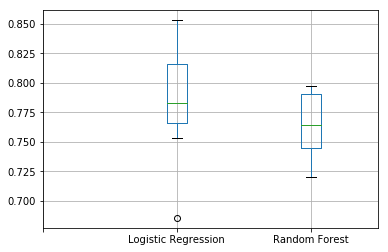

In [368]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
rfc = RandomForestClassifier()
models = [lr,rfc]

summary = model_compare(models, comb_train, y_train, 'accuracy')
summary.boxplot()
plt.xticks(np.arange(3),['','Logistic Regression','Random Forest'])

#we see improved scores for both models with the addition of resp and req!

In [369]:
#looking at our Logreg class. report
lr.fit(comb_train,y_train)
classreport_auc(lr,comb_test,y_test)

#seems the like best AUC score, as well f1 score we got so far!

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       207
           1       0.77      0.61      0.68        88

   micro avg       0.83      0.83      0.83       295
   macro avg       0.81      0.77      0.78       295
weighted avg       0.83      0.83      0.82       295

AUC Score: 0.8563899868247693


In [356]:
#looking at our rfc class. report
rfc.fit(comb_train,y_train)
classreport_auc(rfc,comb_test,y_test)

              precision    recall  f1-score   support

           0       0.76      0.97      0.85       207
           1       0.80      0.27      0.41        88

   micro avg       0.76      0.76      0.76       295
   macro avg       0.78      0.62      0.63       295
weighted avg       0.77      0.76      0.72       295

AUC Score: 0.8107981993851558


#### Gridsearch on best params for both Logistic and RFC

In [350]:
def logreg_gridsearch(X,y):
    """
    Gridsearch for Logistic Regression hyperparameters
    INPUT: X_train and y_train
    OUTPUT: the model fitted with the best estimator
    """
    
    lr = LogisticRegression()

    lr_params = {
        'penalty':['l1','l2'],
        'C':np.logspace(-3,2,30),
        'solver':['liblinear']
    }

    grid_logr = GridSearchCV(lr,param_grid=lr_params,cv=10,n_jobs=-1,verbose=1)
    grid_logr.fit(X,y)
    
    print("Best CV score:", grid_logr.best_score_)
    print("Best parameters:", grid_logr.best_params_)
    
    return grid_logr.best_estimator_

In [353]:
optimal_logr = logreg_gridsearch(comb_train,y_train)
classreport_auc(optimal_logr,comb_test,y_test)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min


Best CV score: 0.8122270742358079
Best parameters: {'C': 0.38566204211634725, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       207
           1       0.67      0.62      0.65        88

   micro avg       0.80      0.80      0.80       295
   macro avg       0.76      0.75      0.75       295
weighted avg       0.79      0.80      0.79       295

AUC Score: 0.8453557312252965


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.8min finished


In [354]:
def rfc_gridsearch(X,y):
    """
    Gridsearch for Random Forest hyperparameters
    INPUT: X_train and y_train
    OUTPUT: the model fitted with the best estimator
    """
    rfc = RandomForestClassifier()

    rfc_params = {
        'n_estimators':[300],
        'min_samples_split':range(2,8)
    }

    grid_rfc = GridSearchCV(rfc,param_grid=rfc_params,cv=10,n_jobs=-1,verbose=1)
    grid_rfc.fit(X,y)
    
    print('best score: ', grid_rfc.best_score_)
    print('best parameters: ', grid_rfc.best_params_)
    
    return grid_rfc.best_estimator_

In [355]:
optimal_rfc = rfc_gridsearch(comb_train,y_train)
classreport_auc(optimal_rfc,comb_test,y_test)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.8min finished


best score:  0.7889374090247453
best parameters:  {'min_samples_split': 3, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.78      0.97      0.86       207
           1       0.84      0.35      0.50        88

   micro avg       0.79      0.79      0.79       295
   macro avg       0.81      0.66      0.68       295
weighted avg       0.80      0.79      0.75       295

AUC Score: 0.8414580588493632


#### Let's try TFIDVectorizer for the Responsibilites and Requirements columns to see if it yields better results~

In [ ]:
#Vectorize and split the responsibilities and requirements columns
tfvec = TfidfVectorizer(ngram_range=(1,2))
resp_train, resp_test, resp_features = text_ttsplit(tfvec,'Responsibilities')
req_train, req_test, req_features = text_ttsplit(tfvec,'Requirements')

In [357]:
#combine with the previous set of features
#convert previous X_train and X_test sets into sparse matrix format for efficient computation
merged_train = hstack([csr_matrix(X_train_emp),resp_train,req_train])  
merged_test = hstack([csr_matrix(X_test_emp),resp_test,req_test])
merged_features = list(u_sen) + list(u_emp) + resp_features + req_features

In [358]:
lr = LogisticRegression()
lr.fit(merged_train,y_train)
classreport_auc(lr, merged_test,y_test)

C:\Users\Jit Nung\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.84      0.92      0.88       207
           1       0.76      0.60      0.67        88

   micro avg       0.82      0.82      0.82       295
   macro avg       0.80      0.76      0.78       295
weighted avg       0.82      0.82      0.82       295

AUC Score: 0.828941589811155


In [359]:
rfc = RandomForestClassifier()
rfc.fit(merged_train,y_train)
classreport_auc(rfc, merged_test,y_test)

C:\Users\Jit Nung\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.77      0.98      0.86       207
           1       0.85      0.32      0.46        88

   micro avg       0.78      0.78      0.78       295
   macro avg       0.81      0.65      0.66       295
weighted avg       0.79      0.78      0.74       295

AUC Score: 0.7894707949055775


#### Seems like AUC scores from Logistic Reg (with Resp and Req being CountVectorized) still gives us the best AUC scores so far..

#### 1.4 Let's try tuning our model by tweaking the parameters from CountVectorizing Resp and Req columns

In [493]:
def tuner(vec,col1,col2,i,df):
    col1_train, col1_test, col1_features = text_ttsplit(vec,col1)
    col2_train, col2_test, col2_features = text_ttsplit(vec,col2)
   
    merge_train = hstack([csr_matrix(X_train_emp), col1_train,col2_train])
    merge_test = hstack([csr_matrix(X_test_emp), col1_test,col2_test])
    merge_features = list(u_sen) + list(u_emp) + col1_features + col2_features
    
    optimal_logr = logreg_gridsearch(merge_train,y_train)
    predictions = optimal_logr.predict(merge_test)
    predict_prob = optimal_logr.predict_proba(merge_test)
    classification_scores = precision_recall_fscore_support(y_test,predictions)
    confusion_scores = confusion_matrix(y_test,predictions)
    auc_score = roc_auc_score(y_test,predict_prob[:,1])
    
    df.loc[i] = [vec,confusion_scores,
                round(classification_scores[0][0],2),round(classification_scores[0][1],2),
                round(classification_scores[1][0],2),round(classification_scores[1][1],2),
                round(classification_scores[2][0],2),round(classification_scores[2][1],2),
                auc_score]    
    return df

In [494]:
summary_df = pd.DataFrame({'Vectorizer':[],'Confusion Matrix':[],
                           'NM Precision':[],'M Precision':[],
                           'NM Recall':[],'M Recall':[],
                           'NM F1':[],'M F1':[],
                           'AUC score':[]})

vec_list = [
    CountVectorizer(),
    CountVectorizer(ngram_range=(1,2)),
    CountVectorizer(stop_words='english'),
    CountVectorizer(ngram_range=(1,2),stop_words='english'),
    CountVectorizer(min_df=2),
    CountVectorizer(min_df=5),
    CountVectorizer(max_df=0.99, min_df=2), 
    CountVectorizer(max_df=0.95, min_df=2),
    CountVectorizer(max_df=0.99, min_df=5), 
    CountVectorizer(max_df=0.95, min_df=5),
    CountVectorizer(ngram_range=(1,2),stop_words='english',min_df=2),
    CountVectorizer(ngram_range=(1,2),stop_words='english',min_df=5)
    ]

for i,vector in enumerate(vec_list):
    results_df = tuner(vector,'responsibilities','requirements',i,summary_df)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   22.8s finished


Best CV score: 0.8224163027656477
Best parameters: {'C': 0.07880462815669913, 'penalty': 'l2', 'solver': 'liblinear'}
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  2.4min finished


Best CV score: 0.8224163027656477
Best parameters: {'C': 0.02395026619987486, 'penalty': 'l2', 'solver': 'liblinear'}
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 479 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   18.9s finished


Best CV score: 0.8238719068413392
Best parameters: {'C': 0.0529831690628371, 'penalty': 'l2', 'solver': 'liblinear'}
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.7min finished


Best CV score: 0.8238719068413392
Best parameters: {'C': 1.2689610031679235, 'penalty': 'l2', 'solver': 'liblinear'}
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 529 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   17.3s finished


Best CV score: 0.8224163027656477
Best parameters: {'C': 0.07880462815669913, 'penalty': 'l2', 'solver': 'liblinear'}
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   13.7s finished


Best CV score: 0.8209606986899564
Best parameters: {'C': 0.07880462815669913, 'penalty': 'l2', 'solver': 'liblinear'}
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   15.5s finished


Best CV score: 0.8224163027656477
Best parameters: {'C': 0.07880462815669913, 'penalty': 'l2', 'solver': 'liblinear'}
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   13.9s finished


Best CV score: 0.8209606986899564
Best parameters: {'C': 0.007278953843983154, 'penalty': 'l2', 'solver': 'liblinear'}
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   11.9s finished


Best CV score: 0.8209606986899564
Best parameters: {'C': 0.07880462815669913, 'penalty': 'l2', 'solver': 'liblinear'}
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   12.9s finished


Best CV score: 0.8209606986899564
Best parameters: {'C': 0.007278953843983154, 'penalty': 'l2', 'solver': 'liblinear'}
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 441 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   30.1s finished


Best CV score: 0.826783114992722
Best parameters: {'C': 1.2689610031679235, 'penalty': 'l1', 'solver': 'liblinear'}
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    1.5s


Best CV score: 0.826783114992722
Best parameters: {'C': 0.03562247890262444, 'penalty': 'l2', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   12.6s finished


In [495]:
#Check the top 5 results
results_df.sort_values('AUC score',ascending = False).head(10)

,Vectorizer,Confusion Matrix,NM Precision,M Precision,NM Recall,M Recall,NM F1,M F1,AUC score
2,"CountVectorizer(analyzer='word', binary=False,...","[[214, 12], [33, 36]]",0.87,0.75,0.95,0.52,0.9,0.62,0.859754
11,"CountVectorizer(analyzer='word', binary=False,...","[[212, 14], [33, 36]]",0.87,0.72,0.94,0.52,0.9,0.61,0.854752
1,"CountVectorizer(analyzer='word', binary=False,...","[[213, 13], [36, 33]]",0.86,0.72,0.94,0.48,0.9,0.57,0.849045
3,"CountVectorizer(analyzer='word', binary=False,...","[[212, 14], [33, 36]]",0.87,0.72,0.94,0.52,0.9,0.61,0.846672
7,"CountVectorizer(analyzer='word', binary=False,...","[[214, 12], [36, 33]]",0.86,0.73,0.95,0.48,0.9,0.58,0.841542
0,"CountVectorizer(analyzer='word', binary=False,...","[[211, 15], [32, 37]]",0.87,0.71,0.93,0.54,0.9,0.61,0.841413
4,"CountVectorizer(analyzer='word', binary=False,...","[[212, 14], [32, 37]]",0.87,0.73,0.94,0.54,0.9,0.62,0.840451
6,"CountVectorizer(analyzer='word', binary=False,...","[[212, 14], [32, 37]]",0.87,0.73,0.94,0.54,0.9,0.62,0.840451
9,"CountVectorizer(analyzer='word', binary=False,...","[[214, 12], [37, 32]]",0.85,0.73,0.95,0.46,0.9,0.57,0.839169
5,"CountVectorizer(analyzer='word', binary=False,...","[[211, 15], [33, 36]]",0.86,0.71,0.93,0.52,0.9,0.60,0.836924


In [496]:
#save the results - checkpoint
results_df.to_csv('vector_tuning_a1.csv')

In [386]:
vec_list[7]

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=None, min_df=2,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [402]:
#Vectorize and split the responsibilities and requirements columns
# cvec = CountVectorizer(ngram_range=(1,2))
cvec = CountVectorizer(max_df=0.95, min_df=2)
resp_train_q1, resp_test_q1, resp_features_q1 = text_ttsplit(cvec,'responsibilities')
req_train_q1, req_test_q1, req_features_q1 = text_ttsplit(cvec,'requirements')

#Merge with the previous set of features
merged_train_q1 = hstack([csr_matrix(X_train_emp),resp_train_q1,req_train_q1])
merged_test_q1 = hstack([csr_matrix(X_test_emp),resp_test_q1,req_test_q1])
merged_features_q1 = list(u_sen) + list(u_emp) + resp_features_q1 + req_features_q1

In [403]:
optimal_logr_q1 = logreg_gridsearch(merged_train_q1,y_train)
classreport_auc(optimal_logr_q1, merged_test_q1, y_test)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    2.2s


Best CV score: 0.8078602620087336
Best parameters: {'C': 0.38566204211634725, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       207
           1       0.70      0.65      0.67        88

   micro avg       0.81      0.81      0.81       295
   macro avg       0.78      0.77      0.77       295
weighted avg       0.81      0.81      0.81       295

AUC Score: 0.8516688625384278


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   15.6s finished


In [404]:
features_df = pd.DataFrame({'Features':merged_features_q1,'coef':optimal_logr_q1.coef_[0],'abs coef':abs(optimal_logr_q1.coef_[0])})
features_df.sort_values('abs coef',ascending=False).head(10)
#top 10 most important features overall

,Features,coef,abs coef
4841,requirements: 10,2.295371,2.295371
7,Executive,-1.001660,1.001660
5,Senior Management,0.878108,0.878108
4650,responsibilities: value,0.698378,0.698378
1993,responsibilities: good,-0.674459,0.674459
3400,responsibilities: programmes,0.671696,0.671696
1177,responsibilities: datarobot,0.664861,0.664861
4756,responsibilities: where,0.541651,0.541651
7104,requirements: platforms,0.530780,0.530780
1415,responsibilities: driving,0.498852,0.498852


In [396]:
features_df.sort_values('coef',ascending=False).head(10)

,Features,coef,abs coef
19838,requirements: 10,1.861610,1.861610
5,Senior Management,0.844805,0.844805
4753,responsibilities: datarobot,0.684920,0.684920
13856,responsibilities: programmes,0.563475,0.563475
19133,responsibilities: value,0.562522,0.562522
7622,responsibilities: frameworks,0.523409,0.523409
18643,responsibilities: travel,0.336330,0.336330
27482,requirements: platforms,0.334790,0.334790
4834,responsibilities: decision,0.332897,0.332897
25955,requirements: like,0.305367,0.305367


In [397]:
#top 10 'Requirements' features
features_df[features_df['Features'].str.contains('requirements')].sort_values('abs coef', ascending = False).head(10)

,Features,coef,abs coef
19838,requirements: 10,1.861610,1.861610
27482,requirements: platforms,0.334790,0.334790
25955,requirements: like,0.305367,0.305367
27294,requirements: people,0.272293,0.272293
26695,requirements: ms,-0.266337,0.266337
30407,requirements: teams,0.260096,0.260096
25733,requirements: large,0.253079,0.253079
21898,requirements: computer,-0.252950,0.252950
27925,requirements: products,0.226521,0.226521
20218,requirements: advantage,-0.198531,0.198531


### Question 1 Summary
For this section, we looked at what factors would impact salary. Main objective was to see what determines a higher pay. 

From the exploratory data analysis, the threshold for higher paying jobs was defined as a minimum monthly salary of $7000, which was the 75 percentile of the jobs scrapped. It was also observed that Senior, Middle Management and Manager roles occurred more often in higher paying jobs. Further, as expected, part-time, freelance, temporary and internship roles see almost no occurences of high pay. Full time, permanent and contract nature see more occurences of high pay but also significantly more occurences of low pay. Thus, we don't see a clear r/s between employment types and pay.

We explored both Logistic Regression and Random Forest models. Text fields for "requirements" and "responsibilities" were vectorized for text processing through a few different means. After trying several models and hyperparameters, we settled on using the count vectorization to transform the text fields before running a Logistic Regression, as that gave the best AUC score, balancing between both precision and accuracy. It also had the advantange of greater interpretability, allowing for insight into the significant factors in identifying a higher paying job.

#### What makes a job high paying?
- Years of experience (10 years - inferred from topmost feature)
- Seniority (Senior Mgmt)
- Responsibilites (appeared heavily in top 10 features)

#### Conclusion
To land high paying data-related jobs, our company needs to look for applicants with greater years of experience, preferably having relevant Mangement experience. On the job side, we would do well in scrutinizing on the Responsibilities listed on the Job description to give the applicant a higher bargaining power. 

## Question 2: Are we able to distinguish Managerial from non-mangerial roles?

### 2.1 EDA

In [406]:
df.columns

Index(['url', 'company', 'title', 'job_id', 'location', 'employment_type',
       'seniority', 'industry', 'salary', 'responsibilities', 'requirements',
       'coy_details', 'min_salary', 'max_salary', 'higher_pay', 'Freelance',
       'Part Time', 'Permanent', 'Temporary', 'Internship', 'Contract',
       'Full Time', 'Fresh/entry level', 'Manager', 'Senior Executive',
       'Middle Management', 'Non-executive', 'Senior Management',
       'Junior Executive', 'Executive', 'Professional'],
      dtype='object')

In [425]:
#Create a new target column of Managerial Roles
df['ManagerialRole']=[1 if df.loc[index][['Manager','Middle Management','Senior Management']].sum() 
                      >=1 else 0 for index in df.index]

df.ManagerialRole.value_counts()

0    742
1    240
Name: ManagerialRole, dtype: int64

([], <a list of 0 Text yticklabel objects>)

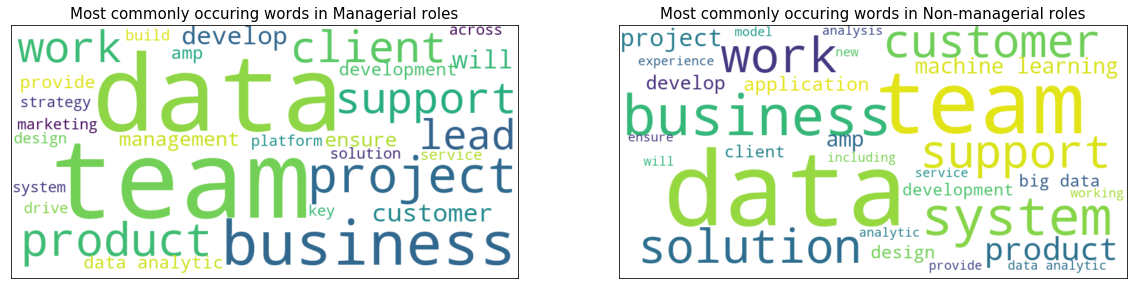

In [430]:
#Take a look at the most commonly occuring words in the job responsibilities

#Separate the text for higher and lower paying jobs
texthigh = ''.join(words for words in df[df['ManagerialRole']==1]['responsibilities'])
textlow = ''.join(words for words in df[df['ManagerialRole']==0]['responsibilities'])

#Generate the words clouds for higher and lower paying jobs
wordcloudhigh=WordCloud(min_font_size=10,scale = 2,prefer_horizontal=1, background_color='White').generate(texthigh)
wordcloudlow= WordCloud(min_font_size=10,scale = 2,prefer_horizontal=1, background_color='White').generate(textlow)

#Plot the wordclouds
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(wordcloudhigh,interpolation='bilinear')
plt.title('Most commonly occuring words in Managerial roles',fontsize=15)
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(wordcloudlow,interpolation='bilinear')
plt.title('Most commonly occuring words in Non-managerial roles',fontsize=15)
plt.xticks([])
plt.yticks([])

#There doesn't seem to be any obvious distinction b/w the responsibilities of a manager and a non-manager. 
#If we were to nitpick, 'management' and 'lead' were mentioned in former, not in latter. 

([], <a list of 0 Text yticklabel objects>)

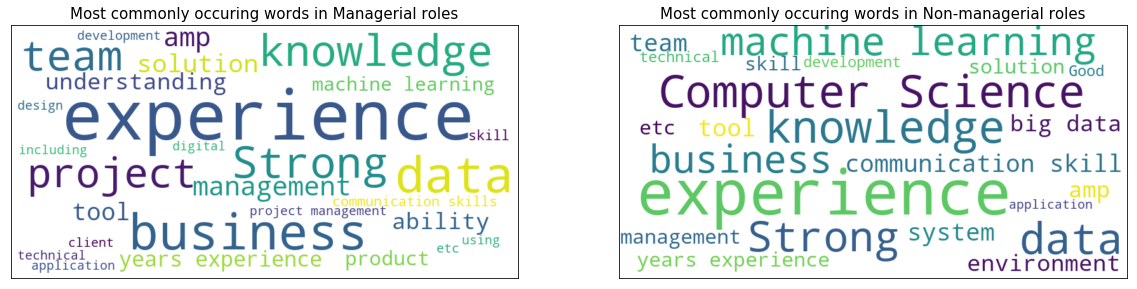

In [431]:
#Take a look at the most commonly occuring words in the job requirements

#Separate the text for higher and lower paying jobs
texthigh = ''.join(words for words in df[df['ManagerialRole']==1]['requirements'])
textlow = ''.join(words for words in df[df['ManagerialRole']==0]['requirements'])

#Generate the words clouds for higher and lower paying jobs
wordcloudhigh=WordCloud(min_font_size=10,scale = 2,prefer_horizontal=1, background_color='White').generate(texthigh)
wordcloudlow= WordCloud(min_font_size=10,scale = 2,prefer_horizontal=1, background_color='White').generate(textlow)

#Plot the wordclouds
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(wordcloudhigh,interpolation='bilinear')
plt.title('Most commonly occuring words in Managerial roles',fontsize=15)
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(wordcloudlow,interpolation='bilinear')
plt.title('Most commonly occuring words in Non-managerial roles',fontsize=15)
plt.xticks([])
plt.yticks([])

### 2.2 Start with a simple model using "Responsibilties"

In [473]:
X = df['responsibilities']
y = df['ManagerialRole']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =33)

In [474]:
#Preprocessing - Vectorizing "responsibilities"
cvect = CountVectorizer(ngram_range=(1,2))
resp_train, resp_test, resp_features = text_ttsplit(cvect, 'responsibilities')

In [475]:
#baseline acc 
max(np.mean(y_test), 1-np.mean(y_test))

0.7661016949152543

In [478]:
#cross val a log reg
lr = LogisticRegression()
scores = cross_val_score(lr, resp_train, y_train, cv=10, n_jobs=-1)
print("Avg CV Score:", np.mean(scores))
lr.fit(resp_train,y_train)
classreport_auc(lr,resp_test,y_test)

Avg CV Score: 0.8062586773839969
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       226
           1       0.73      0.51      0.60        69

   micro avg       0.84      0.84      0.84       295
   macro avg       0.80      0.72      0.75       295
weighted avg       0.83      0.84      0.83       295

AUC Score: 0.8237142490701552


C:\Users\Jit Nung\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [477]:
#cross val a randomforest class.
rfc = RandomForestClassifier()
scores = cross_val_score(rfc, resp_train, y_train, cv=10, n_jobs=-1)
print("Avg CV Score:", np.mean(scores))
rfc.fit(resp_train,y_train)
classreport_auc(rfc,resp_test,y_test)

Avg CV Score: 0.7962391913287054
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       226
           1       0.87      0.38      0.53        69

   micro avg       0.84      0.84      0.84       295
   macro avg       0.85      0.68      0.71       295
weighted avg       0.84      0.84      0.82       295

AUC Score: 0.811882775426446


C:\Users\Jit Nung\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### 2.3 Add 'requirements' into the model!

In [479]:
#Preprocessing - Vectorizing "requirements"
cvect = CountVectorizer(ngram_range=(1,2))
req_train, req_test, req_features = text_ttsplit(cvect, 'requirements')

In [480]:
#Use hstack for combining matrices - responsibilities and requirement 
comb_train = hstack([resp_train,req_train])
comb_test = hstack([resp_test,req_test])
comb_features = resp_features + req_features

In [481]:
comb_train.shape  #checking - num of rows remain the same. But features have grown with the latest addition :) 

(687, 106412)

In [482]:
#cross val a log reg
lr = LogisticRegression()
scores = cross_val_score(lr, comb_train, y_train, cv=10, n_jobs=-1)
print("Avg CV Score:", np.mean(scores))
lr.fit(comb_train,y_train)
classreport_auc(lr, comb_test,y_test)

Avg CV Score: 0.8150815978565339


C:\Users\Jit Nung\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.87      0.93      0.90       226
           1       0.72      0.55      0.62        69

   micro avg       0.84      0.84      0.84       295
   macro avg       0.79      0.74      0.76       295
weighted avg       0.84      0.84      0.84       295

AUC Score: 0.8410606643580865


In [483]:
#cross val a rfc
rfc = RandomForestClassifier()
scores = cross_val_score(rfc, comb_train, y_train, cv=10, n_jobs=-1)
print("Avg CV Score:", np.mean(scores))
rfc.fit(comb_train,y_train)
classreport_auc(rfc, comb_test,y_test)

Avg CV Score: 0.787373645110218
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       226
           1       0.89      0.35      0.50        69

   micro avg       0.84      0.84      0.84       295
   macro avg       0.86      0.67      0.70       295
weighted avg       0.85      0.84      0.81       295

AUC Score: 0.8344555598307041


C:\Users\Jit Nung\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Both models had better AUC scores after addition of 'requirements'. Although RFC model had a marginally better auc score, we are inclined to choose the logreg model as it has better recall-precision ratio for class 1 as seen from the f1-scores. In layman speak, we are able to capture managerial roles more often (better recall).

### 2.4 Try TFIDVectorizer instead and see if we get better results.

In [484]:
#Vectorize and split the responsibilities and requirements columns
tfvec = TfidfVectorizer(ngram_range=(1,2))
resp_train, resp_test, resp_features = text_ttsplit(tfvec,'responsibilities')
req_train, req_test, req_features = text_ttsplit(tfvec,'requirements')

#combine the responsibilities and requirement matrices and features
comb_train = hstack([resp_train,req_train])
comb_test = hstack([resp_test,req_test])
comb_features = resp_features + req_features

In [485]:
#cross val a log reg
lr = LogisticRegression()
scores = cross_val_score(lr, comb_train, y_train, cv=10, n_jobs=-1)
print("Avg CV score:", np.mean(scores))

lr.fit(comb_train,y_train)
classreport_auc(lr,comb_test,y_test)

Avg CV score: 0.7932767019851419
              precision    recall  f1-score   support

           0       0.82      0.99      0.90       226
           1       0.88      0.30      0.45        69

   micro avg       0.83      0.83      0.83       295
   macro avg       0.85      0.65      0.67       295
weighted avg       0.84      0.83      0.79       295

AUC Score: 0.8883224317045016


C:\Users\Jit Nung\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [488]:
#cross val a rfc
rfc = RandomForestClassifier()
scores = cross_val_score(rfc, comb_train, y_train, cv=10, n_jobs=-1)
print("Avg CV score:", np.mean(scores))
rfc.fit(comb_train,y_train)
classreport_auc(rfc,comb_test,y_test)

Avg CV score: 0.7947893070271587
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       226
           1       0.77      0.35      0.48        69

   micro avg       0.82      0.82      0.82       295
   macro avg       0.80      0.66      0.69       295
weighted avg       0.82      0.82      0.80       295

AUC Score: 0.8722264973707836


C:\Users\Jit Nung\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


With TFIDVec, accuracy scores seem to have gone down abit for the logreg model. On the bright side, AUC score went up for both logred and random forest model. Since AUC scores is our priority and benchmark metric, we take it that TFID is a better pre-processing method for our texts in this case. 

### 2.4.1 Tuning of TFIDVectorizer

In [497]:
summary_df_q2 = pd.DataFrame({'Vectorizer':[],'Confusion Matrix':[],
                           'NM Precision':[],'M Precision':[],
                           'NM Recall':[],'M Recall':[],
                           'NM F1':[],'M F1':[],
                           'AUC score':[]})
vec_list_q2 = [
    TfidfVectorizer(),
    TfidfVectorizer(ngram_range=(1,2)),
    TfidfVectorizer(stop_words='english'),
    TfidfVectorizer(ngram_range=(1,2),stop_words='english'),
    TfidfVectorizer(min_df=2),
    TfidfVectorizer(min_df=5),
    TfidfVectorizer(max_df=0.99, min_df=2), 
    TfidfVectorizer(max_df=0.95, min_df=2),
    TfidfVectorizer(max_df=0.99, min_df=5), 
    TfidfVectorizer(max_df=0.95, min_df=5),
    TfidfVectorizer(ngram_range=(1,2),stop_words='english',min_df=2),
    TfidfVectorizer(ngram_range=(1,2),stop_words='english',min_df=5)
    ]

for i,vector in enumerate(vec_list_q2):
    results_df_q2 = tuner(vector,'responsibilities','requirements',i,summary_df_q2)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 533 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 585 out of 600 | elapsed:   25.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   25.3s finished


Best CV score: 0.8151382823871907
Best parameters: {'C': 4.175318936560405, 'penalty': 'l1', 'solver': 'liblinear'}
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 294 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 544 tasks      | elapsed:   55.7s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.1min finished


Best CV score: 0.8151382823871907
Best parameters: {'C': 6.2101694189156165, 'penalty': 'l1', 'solver': 'liblinear'}
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    7.6s finished


Best CV score: 0.8151382823871907
Best parameters: {'C': 4.175318936560405, 'penalty': 'l2', 'solver': 'liblinear'}
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 316 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 566 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   51.7s finished


Best CV score: 0.8107714701601164
Best parameters: {'C': 13.738237958832638, 'penalty': 'l1', 'solver': 'liblinear'}
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    7.5s finished


Best CV score: 0.8165938864628821
Best parameters: {'C': 9.236708571873866, 'penalty': 'l2', 'solver': 'liblinear'}
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    6.3s finished


Best CV score: 0.8195050946142649
Best parameters: {'C': 4.175318936560405, 'penalty': 'l1', 'solver': 'liblinear'}
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    7.6s finished


Best CV score: 0.8165938864628821
Best parameters: {'C': 9.236708571873866, 'penalty': 'l2', 'solver': 'liblinear'}
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    7.9s finished


Best CV score: 0.8180494905385735
Best parameters: {'C': 4.175318936560405, 'penalty': 'l1', 'solver': 'liblinear'}
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    6.7s finished


Best CV score: 0.8195050946142649
Best parameters: {'C': 4.175318936560405, 'penalty': 'l1', 'solver': 'liblinear'}
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    6.3s finished


Best CV score: 0.8209606986899564
Best parameters: {'C': 4.175318936560405, 'penalty': 'l1', 'solver': 'liblinear'}
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 526 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   19.4s finished


Best CV score: 0.8107714701601164
Best parameters: {'C': 9.236708571873866, 'penalty': 'l2', 'solver': 'liblinear'}
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    0.8s


Best CV score: 0.8195050946142649
Best parameters: {'C': 4.175318936560405, 'penalty': 'l2', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    7.7s finished


In [505]:
results_df_q2.sort_values('AUC score', ascending=False).head(10)

,Vectorizer,Confusion Matrix,NM Precision,M Precision,NM Recall,M Recall,NM F1,M F1,AUC score
2,"TfidfVectorizer(analyzer='word', binary=False,...","[[211, 15], [33, 36]]",0.86,0.71,0.93,0.52,0.90,0.60,0.890278
10,"TfidfVectorizer(analyzer='word', binary=False,...","[[211, 15], [30, 39]]",0.88,0.72,0.93,0.57,0.90,0.63,0.884507
11,"TfidfVectorizer(analyzer='word', binary=False,...","[[212, 14], [33, 36]]",0.87,0.72,0.94,0.52,0.90,0.61,0.880595
4,"TfidfVectorizer(analyzer='word', binary=False,...","[[207, 19], [28, 41]]",0.88,0.68,0.92,0.59,0.90,0.64,0.878030
6,"TfidfVectorizer(analyzer='word', binary=False,...","[[207, 19], [28, 41]]",0.88,0.68,0.92,0.59,0.90,0.64,0.878030
1,"TfidfVectorizer(analyzer='word', binary=False,...","[[211, 15], [32, 37]]",0.87,0.71,0.93,0.54,0.90,0.61,0.851545
3,"TfidfVectorizer(analyzer='word', binary=False,...","[[207, 19], [25, 44]]",0.89,0.70,0.92,0.64,0.90,0.67,0.850519
0,"TfidfVectorizer(analyzer='word', binary=False,...","[[212, 14], [37, 32]]",0.85,0.70,0.94,0.46,0.89,0.56,0.843914
7,"TfidfVectorizer(analyzer='word', binary=False,...","[[211, 15], [37, 32]]",0.85,0.68,0.93,0.46,0.89,0.55,0.843465
8,"TfidfVectorizer(analyzer='word', binary=False,...","[[209, 17], [38, 31]]",0.85,0.65,0.92,0.45,0.88,0.53,0.837309


In [506]:
#save the results
results_df_q2.to_csv('vector_comparison_a2.csv')

In [513]:
vec_list_q2[10]   #let's go with this as it strikes the best F1-AUC ratio

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [515]:
#we previously cleaned those with no requirements with 'undisclosed', let's put that into our list of stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop += ['undisclosed']


In [516]:
#Vectorize with the optimal hyperparameters
tfvec = TfidfVectorizer(min_df=2, ngram_range=(1,2), stop_words=stop)
req_train, req_test, req_features = text_ttsplit(tfvec,'requirements')
resp_train, resp_test, resp_features = text_ttsplit(tfvec,'responsibilities')

#combine the responsibilities and requirement matrices and features
comb_train = hstack([resp_train,req_train])
comb_test = hstack([resp_test,req_test])
comb_features = resp_features + req_features

In [517]:
#Logreg model
lr = LogisticRegression()
lr.fit(comb_train,y_train)
classreport_auc(lr,comb_test,y_test)

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       226
           1       0.86      0.35      0.49        69

   micro avg       0.83      0.83      0.83       295
   macro avg       0.84      0.67      0.70       295
weighted avg       0.84      0.83      0.81       295

AUC Score: 0.887745286648711


C:\Users\Jit Nung\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [518]:
#Gridsearch to find best hyperparameters for the best logreg model
optimal_logr = logreg_gridsearch(comb_train,y_train)
optimal_logr.fit(comb_train,y_train)
classreport_auc(optimal_logr,comb_test,y_test)

#AUC score marginally worse, but superior recall on managerial roles more than compensates and boosts the f1-score.

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 287 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 585 out of 600 | elapsed:   18.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   19.2s finished


Best CV score: 0.8238719068413392
Best parameters: {'C': 67.23357536499334, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       226
           1       0.74      0.62      0.68        69

   micro avg       0.86      0.86      0.86       295
   macro avg       0.82      0.78      0.79       295
weighted avg       0.86      0.86      0.86       295

AUC Score: 0.8865909965371296


In [519]:
#Create a DataFrame of the features and their coefficients
features_df = pd.DataFrame({'Features':comb_features,'coef':optimal_logr.coef_[0],'abs coef':abs(optimal_logr.coef_[0])})

In [528]:
#top 10 most positively correlated features
features_df.sort_values('coef',ascending=False).head(10)

,Features,coef,abs coef
11105,responsibilities: manager,4.778995,4.778995
10269,responsibilities: lead,3.652725,3.652725
4289,responsibilities: crm manager,3.498980,3.498980
16474,responsibilities: senior manager,3.306664,3.306664
8237,responsibilities: government,3.292220,3.292220
11130,responsibilities: manager senior,2.803362,2.803362
5644,responsibilities: digital,2.787542,2.787542
23805,requirements: digital,2.746739,2.746739
11124,responsibilities: manager manager,2.726159,2.726159
13949,responsibilities: process,2.704584,2.704584


In [529]:
#top 10 most negatively correlated features
features_df.sort_values('coef',ascending=True).head(10)

,Features,coef,abs coef
1660,responsibilities: assistant,-5.190139,5.190139
1663,responsibilities: assistant manager,-2.991948,2.991948
30096,requirements: responsibilities role,-2.895268,2.895268
30214,requirements: role essential,-2.895268,2.895268
4287,responsibilities: crm data,-2.669924,2.669924
1009,responsibilities: analysis,-2.447574,2.447574
28796,requirements: plus,-2.319778,2.319778
30086,requirements: responsibilities,-2.195161,2.195161
15319,responsibilities: reports,-2.185112,2.185112
4554,responsibilities: data analyst,-2.163594,2.163594


In [530]:
#top 10 most positively correlated 'requirements' features
features_df[features_df['Features'].str.contains('requirements')].sort_values('coef',ascending=False).head(10)

,Features,coef,abs coef
23805,requirements: digital,2.746739,2.746739
26820,requirements: lead,2.573016,2.573016
27257,requirements: management,2.522304,2.522304
29330,requirements: project,2.415515,2.415515
29341,requirements: project management,2.364514,2.364514
22391,requirements: client,2.327300,2.327300
23656,requirements: details,2.233254,2.233254
24891,requirements: experience python,2.194645,2.194645
27412,requirements: marketing,2.188766,2.188766
29179,requirements: product,2.123080,2.123080


In [531]:
#top 10 most negatively correlated 'requirements' features
features_df[features_df['Features'].str.contains('requirements')].sort_values('coef',ascending=True).head(10)

,Features,coef,abs coef
30096,requirements: responsibilities role,-2.895268,2.895268
30214,requirements: role essential,-2.895268,2.895268
28796,requirements: plus,-2.319778,2.319778
30086,requirements: responsibilities,-2.195161,2.195161
24311,requirements: english,-2.032620,2.032620
24961,requirements: experienced,-1.977012,1.977012
30457,requirements: scripting,-1.929976,1.929976
24223,requirements: end,-1.814859,1.814859
22734,requirements: computer,-1.813773,1.813773
23714,requirements: development,-1.754359,1.754359


### 2.5 : Perhaps Oversampling will yield better results?

In [534]:
# !pip install imblearn

In [535]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)

In [538]:
comb_train_smote, y_smote = sm.fit_sample(comb_train,y_train)
optimal_logr = logreg_gridsearch(comb_train_smote,y_smote)
classreport_auc(optimal_logr, comb_test, y_test)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   22.5s finished


Best CV score: 0.9428294573643411
Best parameters: {'C': 100.0, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       226
           1       0.72      0.64      0.68        69

   micro avg       0.86      0.86      0.86       295
   macro avg       0.81      0.78      0.79       295
weighted avg       0.85      0.86      0.85       295

AUC Score: 0.8829998717455431


In [539]:
#better accuracy, but AUC not much improvement. No need to proceed.

### Question 2 Summary
In this section, we looked at whether job responsibilities and requirements could help distinguish managerial and no-managerial roles. The objective is to see what companies are looking for in a managerial role.

Both logistic Regression and Random Forest models were tried, as well as several different kinds of vectorizations in order to process the text fields for job requirements and job responsibilities. I also tried synthetic oversampling methods since managerial roles made up only about 20 percent of the roles, however the results were not much better than without doing so. After trying several models and hyperparameters, we settled on using the term frequency-inverse document frequency to vectorize the words before running a Logistic Regression, as that gave the best F1 score, balancing between both precision and accuracy.

From the top 10 most important features, we can see that it's heavily filled with features from 'responsibilties'. From the 'requirements' feature, we see overlap of words with 'responsibilities' such as digital and lead. These are words with strong signalling effect on a managerial role.


**What does it take to be a manager?**
- Responsibilities: Be willing to take up responsibilities that showcase leadership, be digitally-savvy and know the process of every project
- Requirements: Take initiative to lead and manage projects, secure more clients/client-facetime. 
 